## Importer les Librairies

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. Données

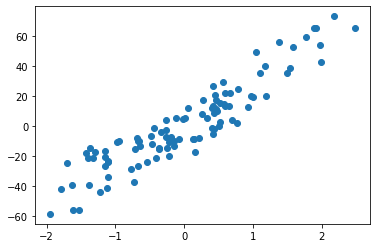

In [2]:
x,y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x,y)

In [3]:
# verification des tailles
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [4]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [5]:
#matrice X
X = np.hstack((np.ones(x.shape),x))
X

array([[ 1.        ,  0.57939932],
       [ 1.        ,  0.05356072],
       [ 1.        , -0.36301223],
       [ 1.        ,  0.14085017],
       [ 1.        , -0.9724714 ],
       [ 1.        , -1.62961283],
       [ 1.        ,  0.56629208],
       [ 1.        ,  1.10128459],
       [ 1.        , -0.06798104],
       [ 1.        , -1.1088831 ],
       [ 1.        ,  0.22171176],
       [ 1.        ,  0.64753716],
       [ 1.        ,  0.77149258],
       [ 1.        ,  0.59549137],
       [ 1.        , -0.68238999],
       [ 1.        ,  1.0439844 ],
       [ 1.        , -0.14335347],
       [ 1.        , -0.46103749],
       [ 1.        , -0.95065366],
       [ 1.        , -0.71879412],
       [ 1.        , -0.43290247],
       [ 1.        , -0.22179277],
       [ 1.        , -1.7036778 ],
       [ 1.        , -1.12362371],
       [ 1.        , -1.21678765],
       [ 1.        ,  0.25976566],
       [ 1.        , -0.65259474],
       [ 1.        , -1.53079712],
       [ 1.        ,

In [6]:
X.shape

(100, 2)

In [7]:
#vecteurs des parametres
beta = np.random.randn(2,1)
beta

array([[0.27333055],
       [0.47953954]])

## 2. Modèle

In [8]:
def model(X,beta):
    return(X.dot(beta))

model(X,beta)

array([[ 0.55117543],
       [ 0.29901503],
       [ 0.09925183],
       [ 0.34087378],
       [-0.19300794],
       [-0.50813324],
       [ 0.54488999],
       [ 0.80144005],
       [ 0.24073095],
       [-0.25842274],
       [ 0.37965011],
       [ 0.58385022],
       [ 0.64329174],
       [ 0.55889221],
       [-0.05390243],
       [ 0.77396235],
       [ 0.20458689],
       [ 0.05224484],
       [-0.18254547],
       [-0.07135965],
       [ 0.0657367 ],
       [ 0.16697215],
       [-0.54365032],
       [-0.26549145],
       [-0.31016724],
       [ 0.39789846],
       [-0.03961443],
       [-0.4607472 ],
       [-0.05139973],
       [-0.39180955],
       [ 1.32017009],
       [ 0.47882935],
       [ 0.84219724],
       [ 0.28059326],
       [ 0.50534053],
       [-0.04830503],
       [ 0.52382665],
       [-0.25505101],
       [ 0.47011812],
       [-0.27949307],
       [ 0.9346032 ],
       [-0.38117842],
       [ 0.20417157],
       [ 0.99024129],
       [ 0.21927231],
       [ 0

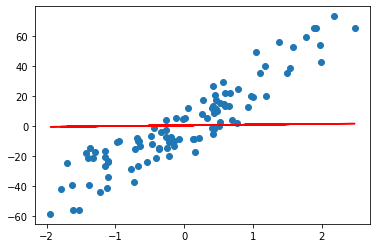

In [9]:
plt.scatter(x,y)
plt.plot(x,model(X,beta),c='r')

## EMV (MCO)

In [11]:
# X.T.dot(X    (X'X)^-1

In [12]:
betaMV =(np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
betaMV

array([[ 0.56073318],
       [26.03660267]])

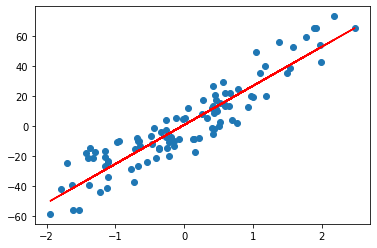

In [13]:
plt.scatter(x,y)
plt.plot(x,model(X,betaMV),c='r')

## R2

In [14]:
#Predictions
predictions = model(X, betaMV)

#Coefficient de détermination
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

coef_determination(y,predictions)

0.8590957505586787

## 2. fonction de coût

In [15]:
def cost_function(X,y,beta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,beta)-y)**2)

cost_function(X,y,beta)

382.2138632232934

## 3. Gradient

In [16]:
def gradient(X,y,theta):
    m = len(y)
    return 1/m *X.T.dot(model(X,theta)-y)

gradient(X,y,beta)

array([[ -0.52815621],
       [-25.55531892]])

## 4. Descente du gradient

In [ ]:
def gradient_descent(X, y, beta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        beta =  beta - learning_rate * gradient(X,y,beta)
        cost_history[i] = cost_function(X,y,beta)
    return beta, cost_history

In [ ]:
beta_final, cost_history = gradient_descent(X, y, beta, learning_rate = 0.01, n_iterations =300)
beta_final

array([[-1.96836486],
       [83.01008723]])

In [ ]:
betaMV

array([[-2.07915185],
       [85.79263362]])

In [ ]:
predictions = model(X, beta_final)
coef_determination(y,predictions)

0.9863966060857345

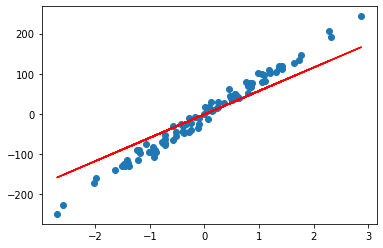

In [ ]:
plt.scatter(x,y)
plt.plot(x,model(X,beta_final),c='r')

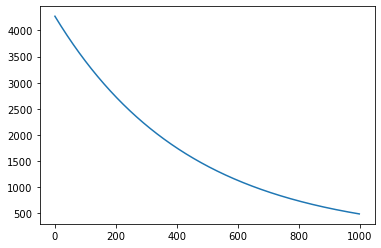

In [ ]:
plt.plot(range(len(cost_history)), cost_history)

In [ ]:
def search(X, y, beta):
    costs = []
    n_iters = []
    for iters in range(100, 800):
        beta_final, cost_history = gradient_descent(X, y, beta, learning_rate=0.01, n_iterations=iters)
        costs.append(cost_history[len(cost_history)-1])
        n_iters.append(iters)
    return n_iters[costs.index(min(costs))]
search(X,y,beta)

799